In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **데이터 전처리**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/no_nan_qna_set.csv', index_col=0)
# df = pd.read_table('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/moonee_qna_set.txt', sep=',', index_col=0)
# df.head()

In [ ]:
sub_type_mapping = {
    '내비게이션': 0,
    '타이어': 1,
    '라이트': 2,
    '시동': 3,
    '경고등': 4,
    '차량외부': 5,
    '차량내부': 6,
    '주행관련': 7,
    '사고조사': 8,
    '단말기': 9,
    '주유/충전카드': 10,
    '후방카메라': 11,
    '하이패스': 12,
    '차량점검': 13,
    '브레이크': 14,
    '블랙박스': 15,
    '위생문제': 16,
    '주차장': 17,
    'ADAS': 18,
    '비치품': 19,
    '충전기확인': 20
}

func = lambda x: sub_type_mapping.get(x, x)

In [ ]:
df['sub_type'] = df['sub_type'].map(func)

In [ ]:
from sklearn.model_selection import train_test_split

# train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=930)

In [ ]:
# drop=True 안 하면 index 열 안 사라짐
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data.sub_type.nunique(), test_data.sub_type.nunique()

(21, 21)

In [ ]:
print('훈련용 리뷰 개수 :', len(train_data)) # 훈련용 개수 출력
print('테스트용 리뷰 개수 :', len(test_data)) # 테스트 개수 출력

훈련용 리뷰 개수 : 4668
테스트용 리뷰 개수 : 1168


In [ ]:
# train_data[:5] # 상위 5개 출력

In [ ]:
# test_data[:5]

In [ ]:
train_data['inquiry'].nunique(), train_data['sub_type'].nunique()

(3922, 21)

In [ ]:
### 일부러 스킵
# train_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

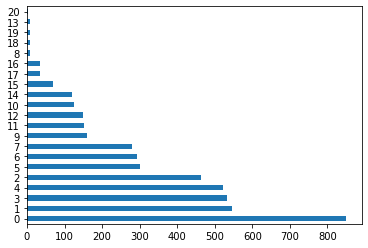

In [ ]:
train_data['sub_type'].value_counts().plot(kind='barh')

In [ ]:
print(train_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    849
1          1    545
2          2    464
3          3    532
4          4    521
5          5    300
6          6    293
7          7    280
8          8      9
9          9    160
10        10    125
11        11    153
12        12    150
13        13      8
14        14    121
15        15     70
16        16     34
17        17     36
18        18      8
19        19      8
20        20      2


In [ ]:
print(test_data.groupby('sub_type').size().reset_index(name='count'))

    sub_type  count
0          0    209
1          1    130
2          2    119
3          3    140
4          4    121
5          5     89
6          6     75
7          7     68
8          8      2
9          9     20
10        10     33
11        11     37
12        12     49
13        13      5
14        14     21
15        15     20
16        16     12
17        17     12
18        18      2
19        19      2
20        20      2


In [ ]:
print(train_data.isnull().values.any())

False


### **토크나이저를 이용한 정수 인코딩**
- 이미 학습해놓은 모델을 사용하다보면 (1)토크나이저, (2)모델 두 가지를 로드해야 한다.

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 7.6 MB/s 
     |████████████████████████████████| 596 kB 63.5 MB/s 
     |████████████████████████████████| 6.6 MB 58.4 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import transformers

transformers.__version__

'4.19.2'

In [ ]:
from transformers import BertTokenizerFast

# tokenizer = BertTokenizerFast.from_pretrained("klue/bert-base") # 사용하고자 하는 모델 이름
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased', do_lower_case=True)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# test_data = test_data.dropna(how='any')

print(len(test_data))

1168


In [ ]:
X_train_list = train_data['inquiry'].tolist()
X_test_list = test_data['inquiry'].tolist()
y_train = train_data['sub_type'].tolist()
y_test = test_data['sub_type'].tolist()

In [ ]:
X_train = tokenizer(X_train_list, truncation=True, padding=True)
X_test = tokenizer(X_test_list, truncation=True, padding=True)

In [ ]:
print(X_train[0].tokens)

['[CLS]', 'ᄌ', '##ᅮ', '##ᄋ', '##ᅲ', '##ᄉ', '##ᅩ', '[UNK]', 'ᄒ', '##ᅪ', '##ᆨ', '##ᄋ', '##ᅵ', '##ᆫ', '##ᄋ', '##ᅳ', '##ᄅ', '##ᅩ', 'ᄋ', '##ᅵ', '##ᆫ', '##ᄋ', '##ᅵ', '##ᆸ', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD

In [ ]:
print(X_train[0].ids)

[101, 1464, 30014, 29999, 30016, 29997, 30011, 100, 1469, 30012, 30020, 29999, 30019, 30021, 29999, 30017, 29994, 30011, 1463, 30019, 30021, 29999, 30019, 30024, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(X_train[0].type_ids)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

> `type_ids`: 풀고자 하는 문제에서 문장 종류의 개수를 의미
> - 일반적으로 2개 이상의 문장을 가지고 푸는 문제일 경우 [0, 0, 0, 0, 1, 1, 1, 1] 이런 식의 값이 들어가지만
> - 네이버 영화 리뷰는 문장 1개를 보고 푸는 문제이므로 [0, 0, 0, 0, 0, 0, 0, 0] 이 들어감


In [ ]:
print(X_train[0].attention_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **데이터셋 생성 및 모델 학습**

In [ ]:
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_train),
    y_train
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(X_test),
    y_test
))

In [ ]:
X_train

In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

In [ ]:
# loss = model.compute_loss
# loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
# from_pt=True: 파이토치에서 학습된 모델인데 tf에서 쓰게 하기 위해

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=21, from_pt=True)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# model.compute_loss

In [ ]:
# Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
# GPU 메모리가 부족할 때 나는 에러 -> batch_size 줄이기

callback_earlystop = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0.001,
    patience=2)

# 32, 64, 64
model.fit(
    train_dataset.shuffle(10000).batch(8), epochs=5, batch_size=8,
    validation_data = val_dataset.shuffle(10000).batch(8),
    callbacks = [callback_earlystop]
)

Epoch 1/5
584/584 [==============================] - 384s 631ms/step - loss: 3.4204 - accuracy: 0.0499 - val_loss: 3.0445 - val_accuracy: 0.0103
Epoch 2/5
584/584 [==============================] - 366s 626ms/step - loss: 3.0544 - accuracy: 0.0332 - val_loss: 3.0445 - val_accuracy: 0.0017
Epoch 3/5
584/584 [==============================] - 366s 627ms/step - loss: 3.0445 - accuracy: 0.0167 - val_loss: 3.0445 - val_accuracy: 0.0017


In [ ]:
# 1024
model.evaluate(val_dataset.batch(512))

3/3 [==============================] - 14s 4s/step - loss: 3.0445 - accuracy: 0.0017


[3.044522523880005, 0.0017123287543654442]

### **모델 저장**

In [ ]:
model_path = '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased'

model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

('/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/tokenizer_config.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/special_tokens_map.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/vocab.txt',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/added_tokens.json',
 '/content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased/tokenizer.json')

### **모델 로드 및 테스트**

In [ ]:
from transformers import TextClassificationPipeline

# 로드하기
loaded_tokenizer = BertTokenizerFast.from_pretrained(model_path)
loaded_model = TFBertForSequenceClassification.from_pretrained(model_path)

text_classifier = TextClassificationPipeline(
    tokenizer=loaded_tokenizer, 
    model=loaded_model, 
    framework='tf',
    return_all_scores=True
)

Some layers from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/AIFFELTHON/AIFFELTHON_BBC/Following_bert/bert_model/bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use

In [ ]:
# test_data

In [ ]:
text_classifier('네비게이션이 안 돼요.')[0]

[{'label': 'LABEL_0', 'score': 0.03869924321770668},
 {'label': 'LABEL_1', 'score': 0.04613753780722618},
 {'label': 'LABEL_2', 'score': 0.03660358116030693},
 {'label': 'LABEL_3', 'score': 0.0474962517619133},
 {'label': 'LABEL_4', 'score': 0.059960488229990005},
 {'label': 'LABEL_5', 'score': 0.04035402089357376},
 {'label': 'LABEL_6', 'score': 0.05471798777580261},
 {'label': 'LABEL_7', 'score': 0.018074875697493553},
 {'label': 'LABEL_8', 'score': 0.06665574759244919},
 {'label': 'LABEL_9', 'score': 0.0452282540500164},
 {'label': 'LABEL_10', 'score': 0.0615401566028595},
 {'label': 'LABEL_11', 'score': 0.02496439777314663},
 {'label': 'LABEL_12', 'score': 0.056336283683776855},
 {'label': 'LABEL_13', 'score': 0.04253308102488518},
 {'label': 'LABEL_14', 'score': 0.04897063598036766},
 {'label': 'LABEL_15', 'score': 0.05690645053982735},
 {'label': 'LABEL_16', 'score': 0.0664065033197403},
 {'label': 'LABEL_17', 'score': 0.02374834008514881},
 {'label': 'LABEL_18', 'score': 0.06219

In [ ]:
# 정렬
rank = {}
for i, n in enumerate(text_classifier('네비게이션이 안 돼요.')[0]):
    # print(n)
    rank[i] = n['score']

print(rank)

{0: 0.03869924321770668, 1: 0.04613753780722618, 2: 0.03660358116030693, 3: 0.0474962517619133, 4: 0.059960488229990005, 5: 0.04035402089357376, 6: 0.05471798777580261, 7: 0.018074875697493553, 8: 0.06665574759244919, 9: 0.0452282540500164, 10: 0.0615401566028595, 11: 0.02496439777314663, 12: 0.056336283683776855, 13: 0.04253308102488518, 14: 0.04897063598036766, 15: 0.05690645053982735, 16: 0.0664065033197403, 17: 0.02374834008514881, 18: 0.06219569966197014, 19: 0.05460301786661148, 20: 0.04786744713783264}


In [ ]:
sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1]))
print(sorted_rank)

# for k, v in sorted_rank:
  # print(k, ': ', v)

{8: 0.06665574759244919, 16: 0.0664065033197403, 18: 0.06219569966197014, 10: 0.0615401566028595, 4: 0.059960488229990005, 15: 0.05690645053982735, 12: 0.056336283683776855, 6: 0.05471798777580261, 19: 0.05460301786661148, 14: 0.04897063598036766, 20: 0.04786744713783264, 3: 0.0474962517619133, 1: 0.04613753780722618, 9: 0.0452282540500164, 13: 0.04253308102488518, 5: 0.04035402089357376, 0: 0.03869924321770668, 2: 0.03660358116030693, 11: 0.02496439777314663, 17: 0.02374834008514881, 7: 0.018074875697493553}


In [ ]:
sorted_rank.keys()

dict_keys([8, 16, 18, 10, 4, 15, 12, 6, 19, 14, 20, 3, 1, 9, 13, 5, 0, 2, 11, 17, 7])

In [ ]:
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}
print(sub_type_mapping_reverse)

{0: '내비게이션', 1: '타이어', 2: '라이트', 3: '시동', 4: '경고등', 5: '차량외부', 6: '차량내부', 7: '주행관련', 8: '사고조사', 9: '단말기', 10: '주유/충전카드', 11: '후방카메라', 12: '하이패스', 13: '차량점검', 14: '브레이크', 15: '블랙박스', 16: '위생문제', 17: '주차장', 18: 'ADAS', 19: '비치품', 20: '충전기확인'}


In [ ]:
for key in sorted_rank.keys():
    print(sub_type_mapping_reverse.get(key))

사고조사
위생문제
ADAS
주유/충전카드
경고등
블랙박스
하이패스
차량내부
비치품
브레이크
충전기확인
시동
타이어
단말기
차량점검
차량외부
내비게이션
라이트
후방카메라
주차장
주행관련


---

### **분류 결과 확인**

In [ ]:
# 정렬 함수

# 맨 처음에 만든 sub_type_mapping 뒤집기 -> dic.get() 함수 쓰기 위해
sub_type_mapping_reverse = {v: k for k, v in sub_type_mapping.items()}

def get_category_name(sentence):
    rank = {}
    for i, n in enumerate(text_classifier(sentence)[0]): # 각 라벨 값, 확률값 dictionary로 새로 저장
        rank[i] = n['score']
    
    sorted_rank = dict(sorted(rank.items(), reverse=True, key=lambda x: x[1])) # dictionary 내림차순 정렬

    # sub_category만 보고 싶을 때
    # for key in sorted_rank.keys():
    #     print(sub_type_mapping_reverse.get(key)) # 확률값 높은 순대로 sub_category 출력

    # 확률값까지 보고 싶을 때
    for key, value in sorted_rank.items():
        print(sub_type_mapping_reverse.get(key), '  ', value)

In [ ]:
get_category_name('네비게이션이 안 돼요')

사고조사    0.0668475329875946
위생문제    0.0657968521118164
ADAS    0.062159180641174316
주유/충전카드    0.06137998774647713
경고등    0.05935312435030937
하이패스    0.05685562267899513
블랙박스    0.056815631687641144
차량내부    0.05468782037496567
비치품    0.05413656309247017
브레이크    0.04895131289958954
충전기확인    0.04808459430932999
시동    0.047981180250644684
타이어    0.046247728168964386
단말기    0.04511495307087898
차량점검    0.04291176423430443
차량외부    0.04067087918519974
내비게이션    0.038137342780828476
라이트    0.037034597247838974
후방카메라    0.025367403402924538
주차장    0.02390388771891594
주행관련    0.017562031745910645


In [ ]:
get_category_name('타이어가 펑크났어요.')

위생문제    0.06659092754125595
사고조사    0.06652607023715973
ADAS    0.062349677085876465
주유/충전카드    0.06154518201947212
경고등    0.060184963047504425
블랙박스    0.056996311992406845
하이패스    0.05620896816253662
차량내부    0.055037885904312134
비치품    0.05464581772685051
브레이크    0.04886755347251892
충전기확인    0.04784449562430382
시동    0.04737702012062073
타이어    0.0459958016872406
단말기    0.045469898730516434
차량점검    0.04247099906206131
차량외부    0.0402732752263546
내비게이션    0.03860240429639816
라이트    0.0363960862159729
후방카메라    0.024688033387064934
주차장    0.023738591000437737
주행관련    0.01819002814590931


In [ ]:
get_category_name('주차 딱지가 붙었는데 어떡하죠?') # 비치품

위생문제    0.0664059966802597
사고조사    0.06635307520627975
ADAS    0.06193535402417183
주유/충전카드    0.06160634756088257
경고등    0.06018192321062088
블랙박스    0.05708375200629234
하이패스    0.05609188601374626
차량내부    0.05476495996117592
비치품    0.05474703758955002
브레이크    0.048976123332977295
충전기확인    0.047850627452135086
시동    0.047518134117126465
타이어    0.04590656980872154
단말기    0.04539826512336731
차량점검    0.0424349382519722
차량외부    0.0403522290289402
내비게이션    0.038856636732816696
라이트    0.036598458886146545
후방카메라    0.02485852874815464
주차장    0.0238113421946764
주행관련    0.018267761915922165


In [ ]:
get_category_name('자동차 전기 충전이 안 돼요 ㅠㅠ')

사고조사    0.06683788448572159
위생문제    0.06579273194074631
ADAS    0.06213825196027756
주유/충전카드    0.061387889087200165
경고등    0.05935031920671463
하이패스    0.05685056000947952
블랙박스    0.05682038888335228
차량내부    0.054677415639162064
비치품    0.0541401207447052
브레이크    0.04895789548754692
충전기확인    0.04808761551976204
시동    0.047992270439863205
타이어    0.04623894765973091
단말기    0.0451151467859745
차량점검    0.0429060161113739
차량외부    0.04067705199122429
내비게이션    0.038146018981933594
라이트    0.037040889263153076
후방카메라    0.025372151285409927
주차장    0.02390696294605732
주행관련    0.017563508823513985


In [ ]:
get_category_name('충전기')

사고조사    0.0668528601527214
위생문제    0.06580167263746262
ADAS    0.062173087149858475
주유/충전카드    0.06137820705771446
경고등    0.059357766062021255
하이패스    0.05685564875602722
블랙박스    0.056814152747392654
차량내부    0.05469660088419914
비치품    0.0541330948472023
브레이크    0.048948317766189575
충전기확인    0.04808207228779793
시동    0.04797716811299324
타이어    0.04624742269515991
단말기    0.04511690139770508
차량점검    0.042910173535346985
차량외부    0.04066728055477142
내비게이션    0.03813135251402855
라이트    0.03703033924102783
후방카메라    0.025360869243741035
주차장    0.0239030122756958
주행관련    0.017561988905072212


In [ ]:
get_category_name('라이트가 안들어와요')

사고조사    0.06684624403715134
위생문제    0.06579507142305374
ADAS    0.06215149536728859
주유/충전카드    0.06138230487704277
경고등    0.0593506321310997
하이패스    0.05685487762093544
블랙박스    0.05681470409035683
차량내부    0.054680973291397095
비치품    0.054138440638780594
브레이크    0.04895348474383354
충전기확인    0.048086054623126984
시동    0.047984227538108826
타이어    0.0462455116212368
단말기    0.04511216655373573
차량점검    0.042910944670438766
차량외부    0.040675029158592224
내비게이션    0.03814252093434334
라이트    0.037038080394268036
후방카메라    0.025372114032506943
주차장    0.02390402927994728
주행관련    0.017561132088303566


In [ ]:
get_category_name('후방 카메라가 망가졌나봐요')

사고조사    0.0668480396270752
위생문제    0.06579889357089996
ADAS    0.06216602399945259
주유/충전카드    0.0613822415471077
경고등    0.05935348570346832
하이패스    0.05685704946517944
블랙박스    0.056815143674612045
차량내부    0.05469175800681114
비치품    0.05413183942437172
브레이크    0.048953525722026825
충전기확인    0.04808509722352028
시동    0.04798172414302826
타이어    0.046243149787187576
단말기    0.04511945694684982
차량점검    0.04290798678994179
차량외부    0.04067220911383629
내비게이션    0.03813309967517853
라이트    0.03703201189637184
후방카메라    0.025362402200698853
주차장    0.023903146386146545
주행관련    0.017561674118041992


In [ ]:
get_category_name('차량 내부가 더러워요')

사고조사    0.06684865802526474
위생문제    0.06580223888158798
ADAS    0.0621696338057518
주유/충전카드    0.061380140483379364
경고등    0.059349484741687775
하이패스    0.05685948580503464
블랙박스    0.05681289732456207
차량내부    0.05469481647014618
비치품    0.05413232371211052
브레이크    0.04895094037055969
충전기확인    0.048085764050483704
시동    0.04797923192381859
타이어    0.04624802991747856
단말기    0.04511704295873642
차량점검    0.04291250556707382
차량외부    0.04067118838429451
내비게이션    0.03812835365533829
라이트    0.037029705941677094
후방카메라    0.02536517009139061
주차장    0.02390279807150364
주행관련    0.01755952462553978


In [ ]:
get_category_name('내비게이션 와이파이가 잘 안됩니다')

사고조사    0.06684700399637222
위생문제    0.06579574197530746
ADAS    0.062149472534656525
주유/충전카드    0.06138300523161888
경고등    0.05934813991189003
하이패스    0.056855376809835434
블랙박스    0.05681545287370682
차량내부    0.05468015745282173
비치품    0.05413758382201195
브레이크    0.04895371198654175
충전기확인    0.048086997121572495
시동    0.047986939549446106
타이어    0.046245891600847244
단말기    0.045114509761333466
차량점검    0.042910609394311905
차량외부    0.040674492716789246
내비게이션    0.038140106946229935
라이트    0.03703721612691879
후방카메라    0.02537156455218792
주차장    0.023904820904135704
주행관련    0.017561178654432297


In [ ]:
get_category_name('브레이크가 잘 안 눌려요')

사고조사    0.06684725731611252
위생문제    0.06579521298408508
ADAS    0.06215183809399605
주유/충전카드    0.06138195842504501
경고등    0.059350840747356415
하이패스    0.056854285299777985
블랙박스    0.05681369826197624
차량내부    0.054680053144693375
비치품    0.05413733050227165
브레이크    0.04895596578717232
충전기확인    0.04808654636144638
시동    0.04798588901758194
타이어    0.04624417424201965
단말기    0.045113515108823776
차량점검    0.04291027784347534
차량외부    0.040674518793821335
내비게이션    0.03814214840531349
라이트    0.037038326263427734
후방카메라    0.025371169671416283
주차장    0.023904236033558846
주행관련    0.017560705542564392


In [ ]:
get_category_name('경고등이 깜빡깜빡 거립니다')

사고조사    0.06683763861656189
위생문제    0.06579339504241943
ADAS    0.06214435026049614
주유/충전카드    0.06138673052191734
경고등    0.05935392528772354
하이패스    0.05685161426663399
블랙박스    0.05682050436735153
차량내부    0.05468258261680603
비치품    0.05413754656910896
브레이크    0.04895747825503349
충전기확인    0.048087187111377716
시동    0.047989677637815475
타이어    0.04623797535896301
단말기    0.045114997774362564
차량점검    0.0429065115749836
차량외부    0.040675804018974304
내비게이션    0.03814335912466049
라이트    0.03703940659761429
후방카메라    0.025369970127940178
주차장    0.02390565723180771
주행관련    0.01756364479660988
